In [39]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is C0E8-3C20

 Directory of C:\Users\Deepak\Data Science projects\AUDIO CLASSIFICATION PROJECT\Audio Classification Project files_Trial

13/06/2021  02:04 PM    <DIR>          .
13/06/2021  02:04 PM    <DIR>          ..
13/06/2021  01:34 PM    <DIR>          .ipynb_checkpoints
13/06/2021  01:52 AM           708,430 1.wav
13/06/2021  01:58 PM    <DIR>          Audio Classification Project files
13/06/2021  02:45 AM         1,007,645 Audio_Classification_trial_EDA.ipynb
13/06/2021  02:04 PM            78,741 Audio_classification_trial_preprocessing.ipynb
13/06/2021  02:47 AM            13,627 Challenges.docx
13/06/2021  02:02 PM               240 sound_metadata.csv
               5 File(s)      1,808,683 bytes
               4 Dir(s)  24,680,525,824 bytes free


In [100]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
#Here we are getting audio data and sample rate

In [101]:
print(librosa_audio_data)

[ 3.8459033e-02  5.9552170e-02  5.1253099e-02 ... -3.5394205e-05
 -2.3769824e-05  3.0676751e-05]


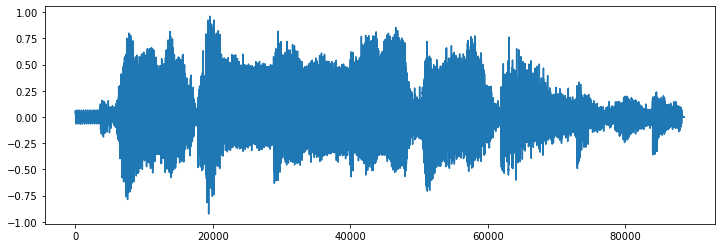

In [102]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [103]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [104]:
wave_audio
#Here now we can see two features. Whereas, with Librosa, we would only get one feature

array([[1556, 1556],
       [1964, 1964],
       [1722, 1722],
       ...,
       [   1,    1],
       [   0,    0],
       [   2,    2]], dtype=int16)

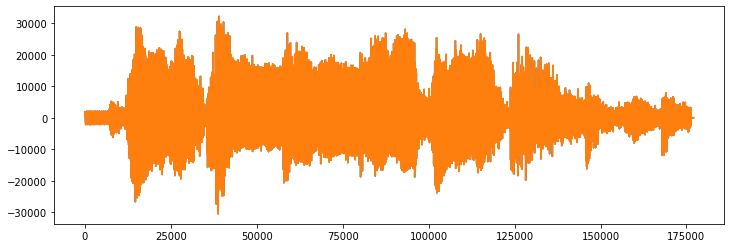

In [105]:
# import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

#This is the data of two channels here

In [106]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [107]:
mfccs
#These are the patterns of the above given audio file that have been extraced based on the frequency and time characteristics.
#Therefore, we can use this to identify uniquely the particular audio signal in which class it will belong

array([[-442.7457    , -449.886     , -457.18692   , ..., -172.46219   ,
        -176.86172   , -190.89713   ],
       [  82.17285   ,   80.372696  ,   71.776855  , ...,   57.051414  ,
          61.07658   ,   73.35896   ],
       [  74.285255  ,   66.498764  ,   59.206062  , ...,  -29.75504   ,
         -28.300732  ,  -28.39487   ],
       ...,
       [  -6.044397  ,   -5.098351  ,   -5.1024246 , ...,  -10.606062  ,
         -10.945667  ,   -6.896298  ],
       [  -6.9419646 ,   -7.80114   ,   -9.334776  , ...,   -9.940796  ,
         -13.1545105 ,  -11.511626  ],
       [  -5.826966  ,   -8.477451  ,  -10.900091  , ...,    4.0567374 ,
           0.47019273,    4.5725083 ]], dtype=float32)

In [108]:
#So far we only did it for one file. But we need to do the same for multiple files, may be thousands of them. what to do?
#Following can be applied

#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='C:/Users/Deepak/Data Science projects/AUDIO CLASSIFICATION PROJECT/Audio Classification Project files_Trial/Audio Classification Project files/'
metadata=pd.read_csv('C:/Users/Deepak/Data Science projects/AUDIO CLASSIFICATION PROJECT/Audio Classification Project files_Trial/sound_metadata.csv')
metadata.head()

,file_name,fold,class
0,6.wav,1,Akon
1,7.wav,1,Akon
2,8.wav,1,Akon
3,11.wav,2,Arijit
4,12.wav,2,Arijit


In [109]:
#For only one audio file
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [110]:
#For multiple audio files
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

17it [00:00, 19.07it/s]


In [111]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-38.70855, 84.40536, -9.689506, 27.917618, -1...",Akon
1,"[-62.83616, 70.22496, -0.905351, 33.41462, -6....",Akon
2,"[-50.787025, 94.34354, -16.991825, 32.5428, -1...",Akon
3,"[-54.849506, 123.52792, -12.572074, 38.873177,...",Arijit
4,"[-155.43565, 87.07396, -10.793199, 13.622792, ...",Arijit


In [112]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [113]:
X.shape

(17, 40)

In [114]:
### Label Encoding
#y=np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [115]:
y.shape
#There are 6 different classes in our dataset

(17, 6)

In [116]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [117]:
X_train

array([[-2.30437546e+02,  1.01345261e+02,  5.55315924e+00,
         2.18766003e+01,  5.45449114e+00,  7.38121414e+00,
        -1.32328091e+01,  6.28462934e+00, -3.17775178e+00,
         7.39479780e+00, -4.97343016e+00, -3.93049645e+00,
        -1.79374943e+01,  1.14184294e+01, -9.33437157e+00,
         3.53128242e+00, -1.32694159e+01, -2.80503941e+00,
        -1.91918488e+01, -7.75601339e+00, -3.30283880e+00,
        -4.28425741e+00, -4.29037094e+00,  4.25013971e+00,
        -4.73424864e+00,  3.85987282e+00,  1.71121156e+00,
         5.15370607e+00,  1.07225142e+01,  5.20108986e+00,
         1.26685553e+01,  2.51037931e+00,  2.70004249e+00,
         1.70832300e+00,  5.30467558e+00,  3.08787942e+00,
         5.18011189e+00,  2.49022007e+00, -5.03261375e+00,
        -4.84495497e+00],
       [-1.55435654e+02,  8.70739594e+01, -1.07931986e+01,
         1.36227922e+01, -1.84174080e+01, -1.05089550e+01,
        -5.20077324e+01, -1.38977633e+01, -2.95598621e+01,
        -1.00037308e+01, -1.77

In [118]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [119]:
X_train.shape

(13, 40)

In [120]:
X_test.shape

(4, 40)

In [121]:
y_train.shape

(13, 6)

In [122]:
y_test.shape

(4, 6)

# Model creation

In [123]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [125]:
#No of classes
num_labels=y.shape[1]

In [126]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [127]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [128]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [129]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 35.3856 - accuracy: 0.1538
Epoch 00001: val_loss improved from inf to 20.25750, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 134ms/step - loss: 35.3856 - accuracy: 0.1538 - val_loss: 20.2575 - val_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 46.9115 - accuracy: 0.1538
Epoch 00002: val_loss improved from 20.25750 to 18.67074, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 18ms/step - loss: 46.9115 - accuracy: 0.1538 - val_loss: 18.6707 - val_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 39.4723 - accuracy: 0.2308
Epoch 00003: val_loss improved from 18.67074 to 17.68562, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 23ms/step - loss: 39.4723 - accuracy: 0.2308 - val_loss: 17.6856 - val_ac

Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 22.0652 - accuracy: 0.0769
Epoch 00026: val_loss improved from 8.86561 to 8.20903, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 24ms/step - loss: 22.0652 - accuracy: 0.0769 - val_loss: 8.2090 - val_accuracy: 0.0000e+00
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 16.3406 - accuracy: 0.3077
Epoch 00027: val_loss improved from 8.20903 to 7.59789, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 29ms/step - loss: 16.3406 - accuracy: 0.3077 - val_loss: 7.5979 - val_accuracy: 0.0000e+00
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 21.0534 - accuracy: 0.0769
Epoch 00028: val_loss improved from 7.59789 to 7.09268, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 26ms/step - loss: 21.0534 - accuracy: 0.0769 - val_loss: 7.0927 - val_accu

1/1 [==============================] - ETA: 0s - loss: 18.3814 - accuracy: 0.2308
Epoch 00050: val_loss improved from 3.23793 to 3.21479, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 25ms/step - loss: 18.3814 - accuracy: 0.2308 - val_loss: 3.2148 - val_accuracy: 0.0000e+00
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 19.5201 - accuracy: 0.1538
Epoch 00051: val_loss improved from 3.21479 to 3.13559, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 22ms/step - loss: 19.5201 - accuracy: 0.1538 - val_loss: 3.1356 - val_accuracy: 0.0000e+00
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 12.8638 - accuracy: 0.3077
Epoch 00052: val_loss improved from 3.13559 to 3.06443, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 23ms/step - loss: 12.8638 - accuracy: 0.3077 - val_loss: 3.0644 - val_accuracy: 0.0000e

Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 8.1204 - accuracy: 0.3077
Epoch 00075: val_loss improved from 1.64747 to 1.61714, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 21ms/step - loss: 8.1204 - accuracy: 0.3077 - val_loss: 1.6171 - val_accuracy: 0.7500
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 11.5961 - accuracy: 0.2308
Epoch 00076: val_loss improved from 1.61714 to 1.58297, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 25ms/step - loss: 11.5961 - accuracy: 0.2308 - val_loss: 1.5830 - val_accuracy: 0.7500
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 2.9325 - accuracy: 0.6154
Epoch 00077: val_loss improved from 1.58297 to 1.55096, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 23ms/step - loss: 2.9325 - accuracy: 0.6154 - val_loss: 1.5510 - val_accuracy: 0.7500

Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 9.8111 - accuracy: 0.3846
Epoch 00100: val_loss improved from 0.86620 to 0.82941, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 22ms/step - loss: 9.8111 - accuracy: 0.3846 - val_loss: 0.8294 - val_accuracy: 0.7500
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 4.3629 - accuracy: 0.3846
Epoch 00101: val_loss improved from 0.82941 to 0.78543, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 26ms/step - loss: 4.3629 - accuracy: 0.3846 - val_loss: 0.7854 - val_accuracy: 0.7500
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 4.6982 - accuracy: 0.6923
Epoch 00102: val_loss improved from 0.78543 to 0.75063, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 27ms/step - loss: 4.6982 - accuracy: 0.6923 - val_loss: 0.7506 - val_accuracy: 0.750

Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 4.8971 - accuracy: 0.4615
Epoch 00125: val_loss improved from 0.51000 to 0.50191, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 20ms/step - loss: 4.8971 - accuracy: 0.4615 - val_loss: 0.5019 - val_accuracy: 1.0000
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 5.0298 - accuracy: 0.2308
Epoch 00126: val_loss improved from 0.50191 to 0.49178, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 20ms/step - loss: 5.0298 - accuracy: 0.2308 - val_loss: 0.4918 - val_accuracy: 1.0000
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 4.2888 - accuracy: 0.3077
Epoch 00127: val_loss improved from 0.49178 to 0.47918, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 22ms/step - loss: 4.2888 - accuracy: 0.3077 - val_loss: 0.4792 - val_accuracy: 1.000

1/1 [==============================] - ETA: 0s - loss: 2.3437 - accuracy: 0.4615
Epoch 00152: val_loss did not improve from 0.42722
1/1 [==============================] - 0s 23ms/step - loss: 2.3437 - accuracy: 0.4615 - val_loss: 0.4603 - val_accuracy: 1.0000
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 3.9886 - accuracy: 0.3846
Epoch 00153: val_loss did not improve from 0.42722
1/1 [==============================] - 0s 21ms/step - loss: 3.9886 - accuracy: 0.3846 - val_loss: 0.4618 - val_accuracy: 1.0000
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 4.0584 - accuracy: 0.3846
Epoch 00154: val_loss did not improve from 0.42722
1/1 [==============================] - 0s 22ms/step - loss: 4.0584 - accuracy: 0.3846 - val_loss: 0.4612 - val_accuracy: 1.0000
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 1.2760 - accuracy: 0.6154
Epoch 00155: val_loss did not improve from 0.42722
1/1 [==============================] - 0s 20ms

Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 3.4924 - accuracy: 0.4615
Epoch 00182: val_loss did not improve from 0.42722
1/1 [==============================] - 0s 22ms/step - loss: 3.4924 - accuracy: 0.4615 - val_loss: 0.4623 - val_accuracy: 1.0000
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 4.8977 - accuracy: 0.3846
Epoch 00183: val_loss did not improve from 0.42722
1/1 [==============================] - 0s 22ms/step - loss: 4.8977 - accuracy: 0.3846 - val_loss: 0.4595 - val_accuracy: 1.0000
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 5.6272 - accuracy: 0.2308
Epoch 00184: val_loss did not improve from 0.42722
1/1 [==============================] - 0s 21ms/step - loss: 5.6272 - accuracy: 0.2308 - val_loss: 0.4527 - val_accuracy: 1.0000
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 2.7040 - accuracy: 0.6154
Epoch 00185: val_loss did not improve from 0.42722
1/1 [===========================

Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 1.9358 - accuracy: 0.4615
Epoch 00208: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 21ms/step - loss: 1.9358 - accuracy: 0.4615 - val_loss: 0.3406 - val_accuracy: 1.0000
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 2.8089 - accuracy: 0.4615
Epoch 00209: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 20ms/step - loss: 2.8089 - accuracy: 0.4615 - val_loss: 0.3431 - val_accuracy: 1.0000
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 2.0223 - accuracy: 0.6923
Epoch 00210: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 21ms/step - loss: 2.0223 - accuracy: 0.6923 - val_loss: 0.3451 - val_accuracy: 1.0000
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 2.1099 - accuracy: 0.5385
Epoch 00211: val_loss did not improve from 0.33906
1/1 [===========================

Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 2.0446 - accuracy: 0.4615
Epoch 00238: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 22ms/step - loss: 2.0446 - accuracy: 0.4615 - val_loss: 0.4481 - val_accuracy: 1.0000
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 1.8077 - accuracy: 0.4615
Epoch 00239: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 22ms/step - loss: 1.8077 - accuracy: 0.4615 - val_loss: 0.4469 - val_accuracy: 1.0000
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 1.8425 - accuracy: 0.5385
Epoch 00240: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 21ms/step - loss: 1.8425 - accuracy: 0.5385 - val_loss: 0.4455 - val_accuracy: 1.0000
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 2.0572 - accuracy: 0.3846
Epoch 00241: val_loss did not improve from 0.33906
1/1 [===========================

Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 1.5434 - accuracy: 0.4615
Epoch 00268: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 21ms/step - loss: 1.5434 - accuracy: 0.4615 - val_loss: 0.3674 - val_accuracy: 1.0000
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 1.7682 - accuracy: 0.6154
Epoch 00269: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 22ms/step - loss: 1.7682 - accuracy: 0.6154 - val_loss: 0.3634 - val_accuracy: 1.0000
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 5.4824 - accuracy: 0.5385
Epoch 00270: val_loss did not improve from 0.33906
1/1 [==============================] - 0s 21ms/step - loss: 5.4824 - accuracy: 0.5385 - val_loss: 0.3603 - val_accuracy: 1.0000
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 1.0484 - accuracy: 0.8462
Epoch 00271: val_loss did not improve from 0.33906
1/1 [===========================

Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 2.1081 - accuracy: 0.6154
Epoch 00294: val_loss improved from 0.26706 to 0.26197, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 23ms/step - loss: 2.1081 - accuracy: 0.6154 - val_loss: 0.2620 - val_accuracy: 1.0000
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.8280 - accuracy: 0.6923
Epoch 00295: val_loss improved from 0.26197 to 0.25902, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 24ms/step - loss: 0.8280 - accuracy: 0.6923 - val_loss: 0.2590 - val_accuracy: 1.0000
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 1.3592 - accuracy: 0.6154
Epoch 00296: val_loss improved from 0.25902 to 0.25825, saving model to saved_models\audio_classification.hdf5
1/1 [==============================] - 0s 21ms/step - loss: 1.3592 - accuracy: 0.6154 - val_loss: 0.2582 - val_accuracy: 1.000

Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 2.2796 - accuracy: 0.6154
Epoch 00322: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 22ms/step - loss: 2.2796 - accuracy: 0.6154 - val_loss: 0.2908 - val_accuracy: 1.0000
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 1.9056 - accuracy: 0.6923
Epoch 00323: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 19ms/step - loss: 1.9056 - accuracy: 0.6923 - val_loss: 0.2878 - val_accuracy: 1.0000
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 1.5653 - accuracy: 0.6923
Epoch 00324: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 20ms/step - loss: 1.5653 - accuracy: 0.6923 - val_loss: 0.2862 - val_accuracy: 1.0000
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.4261 - accuracy: 0.7692
Epoch 00325: val_loss did not improve from 0.25197
1/1 [===========================

Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.9768 - accuracy: 0.7692
Epoch 00352: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 21ms/step - loss: 0.9768 - accuracy: 0.7692 - val_loss: 0.2841 - val_accuracy: 1.0000
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.5471 - accuracy: 0.8462
Epoch 00353: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 21ms/step - loss: 0.5471 - accuracy: 0.8462 - val_loss: 0.2809 - val_accuracy: 1.0000
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 1.9076 - accuracy: 0.4615
Epoch 00354: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 21ms/step - loss: 1.9076 - accuracy: 0.4615 - val_loss: 0.2789 - val_accuracy: 1.0000
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 1.3337 - accuracy: 0.6923
Epoch 00355: val_loss did not improve from 0.25197
1/1 [===========================

Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.7676 - accuracy: 0.6923
Epoch 00382: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 19ms/step - loss: 0.7676 - accuracy: 0.6923 - val_loss: 0.2913 - val_accuracy: 1.0000
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.2998 - accuracy: 0.9231
Epoch 00383: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 21ms/step - loss: 0.2998 - accuracy: 0.9231 - val_loss: 0.2917 - val_accuracy: 1.0000
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.3578 - accuracy: 0.9231
Epoch 00384: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 22ms/step - loss: 0.3578 - accuracy: 0.9231 - val_loss: 0.2925 - val_accuracy: 1.0000
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 1.2464 - accuracy: 0.8462
Epoch 00385: val_loss did not improve from 0.25197
1/1 [===========================

Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 1.2568 - accuracy: 0.5385
Epoch 00412: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 19ms/step - loss: 1.2568 - accuracy: 0.5385 - val_loss: 0.2960 - val_accuracy: 1.0000
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.9642 - accuracy: 0.6923
Epoch 00413: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 23ms/step - loss: 0.9642 - accuracy: 0.6923 - val_loss: 0.2973 - val_accuracy: 1.0000
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.9227 - accuracy: 0.6154
Epoch 00414: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 21ms/step - loss: 0.9227 - accuracy: 0.6154 - val_loss: 0.3000 - val_accuracy: 1.0000
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.4124 - accuracy: 0.9231
Epoch 00415: val_loss did not improve from 0.25197
1/1 [===========================

Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.8242 - accuracy: 0.6923
Epoch 00442: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 21ms/step - loss: 0.8242 - accuracy: 0.6923 - val_loss: 0.2878 - val_accuracy: 1.0000
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 1.7880 - accuracy: 0.6923
Epoch 00443: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 21ms/step - loss: 1.7880 - accuracy: 0.6923 - val_loss: 0.2861 - val_accuracy: 1.0000
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 1.8220 - accuracy: 0.6923
Epoch 00444: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 22ms/step - loss: 1.8220 - accuracy: 0.6923 - val_loss: 0.2899 - val_accuracy: 1.0000
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.9132 - accuracy: 0.6923
Epoch 00445: val_loss did not improve from 0.25197
1/1 [===========================

Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.8462
Epoch 00472: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 23ms/step - loss: 0.3931 - accuracy: 0.8462 - val_loss: 0.3979 - val_accuracy: 1.0000
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9231
Epoch 00473: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 19ms/step - loss: 0.1984 - accuracy: 0.9231 - val_loss: 0.4011 - val_accuracy: 1.0000
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.9231
Epoch 00474: val_loss did not improve from 0.25197
1/1 [==============================] - 0s 21ms/step - loss: 0.4115 - accuracy: 0.9231 - val_loss: 0.4037 - val_accuracy: 1.0000
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.8145 - accuracy: 0.7692
Epoch 00475: val_loss did not improve from 0.25197
1/1 [===========================

In [130]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [131]:
filename = "C:/Users/Deepak/Data Science projects/AUDIO CLASSIFICATION PROJECT/Audio Classification Project files_Trial/1.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([5], dtype=int64)

In [132]:
metadata['class'].unique()

array(['Akon', 'Arijit', 'Bruno', 'ColdPlay', 'Deepak', 'Sonu Nigam'],
      dtype=object)

In [133]:
model.predict_classes(X_test)

array([0, 2, 3, 3], dtype=int64)

# Testing

In [146]:
filename="C:/Users/Deepak/Data Science projects/AUDIO CLASSIFICATION PROJECT/Audio Classification Project files_Trial/10.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-28.092842   80.88708     4.441691   32.178646   -9.230551   28.776361
 -12.002411   28.427149   -8.991505   14.76534    -6.4842534  10.033066
  -8.419233   12.359282   -0.8662329  12.684039    2.4176512   9.048288
  -5.3628488   7.438497    2.6704338   4.396557   -7.685591    0.2079909
  -8.454808    7.246256    4.875302    5.682069   -2.588348    1.9113568
   9.045355   11.383708   -2.1818602  -1.4999151  -3.9800828  -2.049265
  -1.9804024   2.24939     4.0213227   5.912825 ]
[[-28.092842   80.88708     4.441691   32.178646   -9.230551   28.776361
  -12.002411   28.427149   -8.991505   14.76534    -6.4842534  10.033066
   -8.419233   12.359282   -0.8662329  12.684039    2.4176512   9.048288
   -5.3628488   7.438497    2.6704338   4.396557   -7.685591    0.2079909
   -8.454808    7.246256    4.875302    5.682069   -2.588348    1.9113568
    9.045355   11.383708   -2.1818602  -1.4999151  -3.9800828  -2.049265
   -1.9804024   2.24939     4.0213227   5.912825 ]]
(1, 40)
[2]


array(['Bruno'], dtype='<U10')